# **Phase 1 - Golden Task - Diabeties Predction**

In [ ]:
#reading the data set
import pandas as pd
diabeties = pd.read_csv("/content/drive/MyDrive/Intern Project/Phase 1- Intern project/diabetes.csv")

In [ ]:
# To display the top 5 rows
diabeties.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# To display the bottom 5 rows
diabeties.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# total number of rows and columns
# Dataset comprises of 768 observations and 9 characteristics.
# Out of which one is dependent variable and rest 8 are independent variables
diabeties.shape

(768, 9)

In [ ]:
# Data has only float and integer values
# No variable column has null/missing values
diabeties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Getting various summary statistics
# There is notably a large difference between 99% and max values of predictors “Insulin”,”SkinThickness”,”DiabetesPedigreeFunction”
# There are extreme values-Outliers in our data set
diabeties.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# Target variable categorical
diabeties.Outcome.unique()

array([1, 0])

In [ ]:
#value count of Outcome
diabeties.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

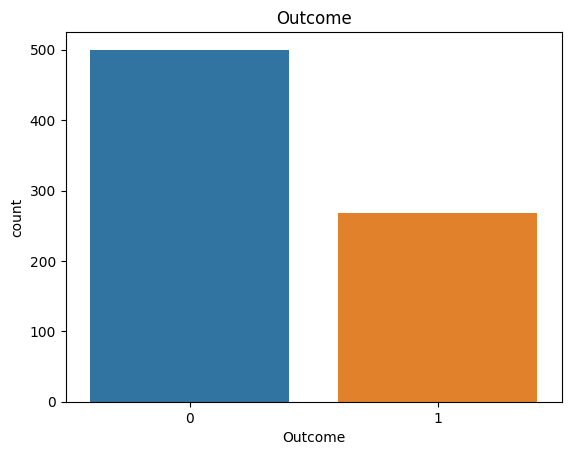

In [ ]:
# Exploring the target variable

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Outcome', data=diabeties)
plt.title('Outcome')
plt.show()

<Axes: >

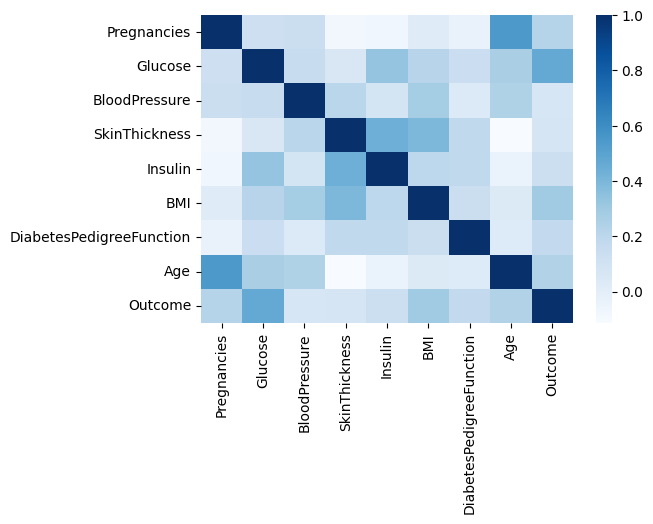

In [ ]:
#heatmap for correlation
plt.figure(figsize=(6,4))
sns.heatmap(diabeties.corr(),cmap='Blues',annot=False)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

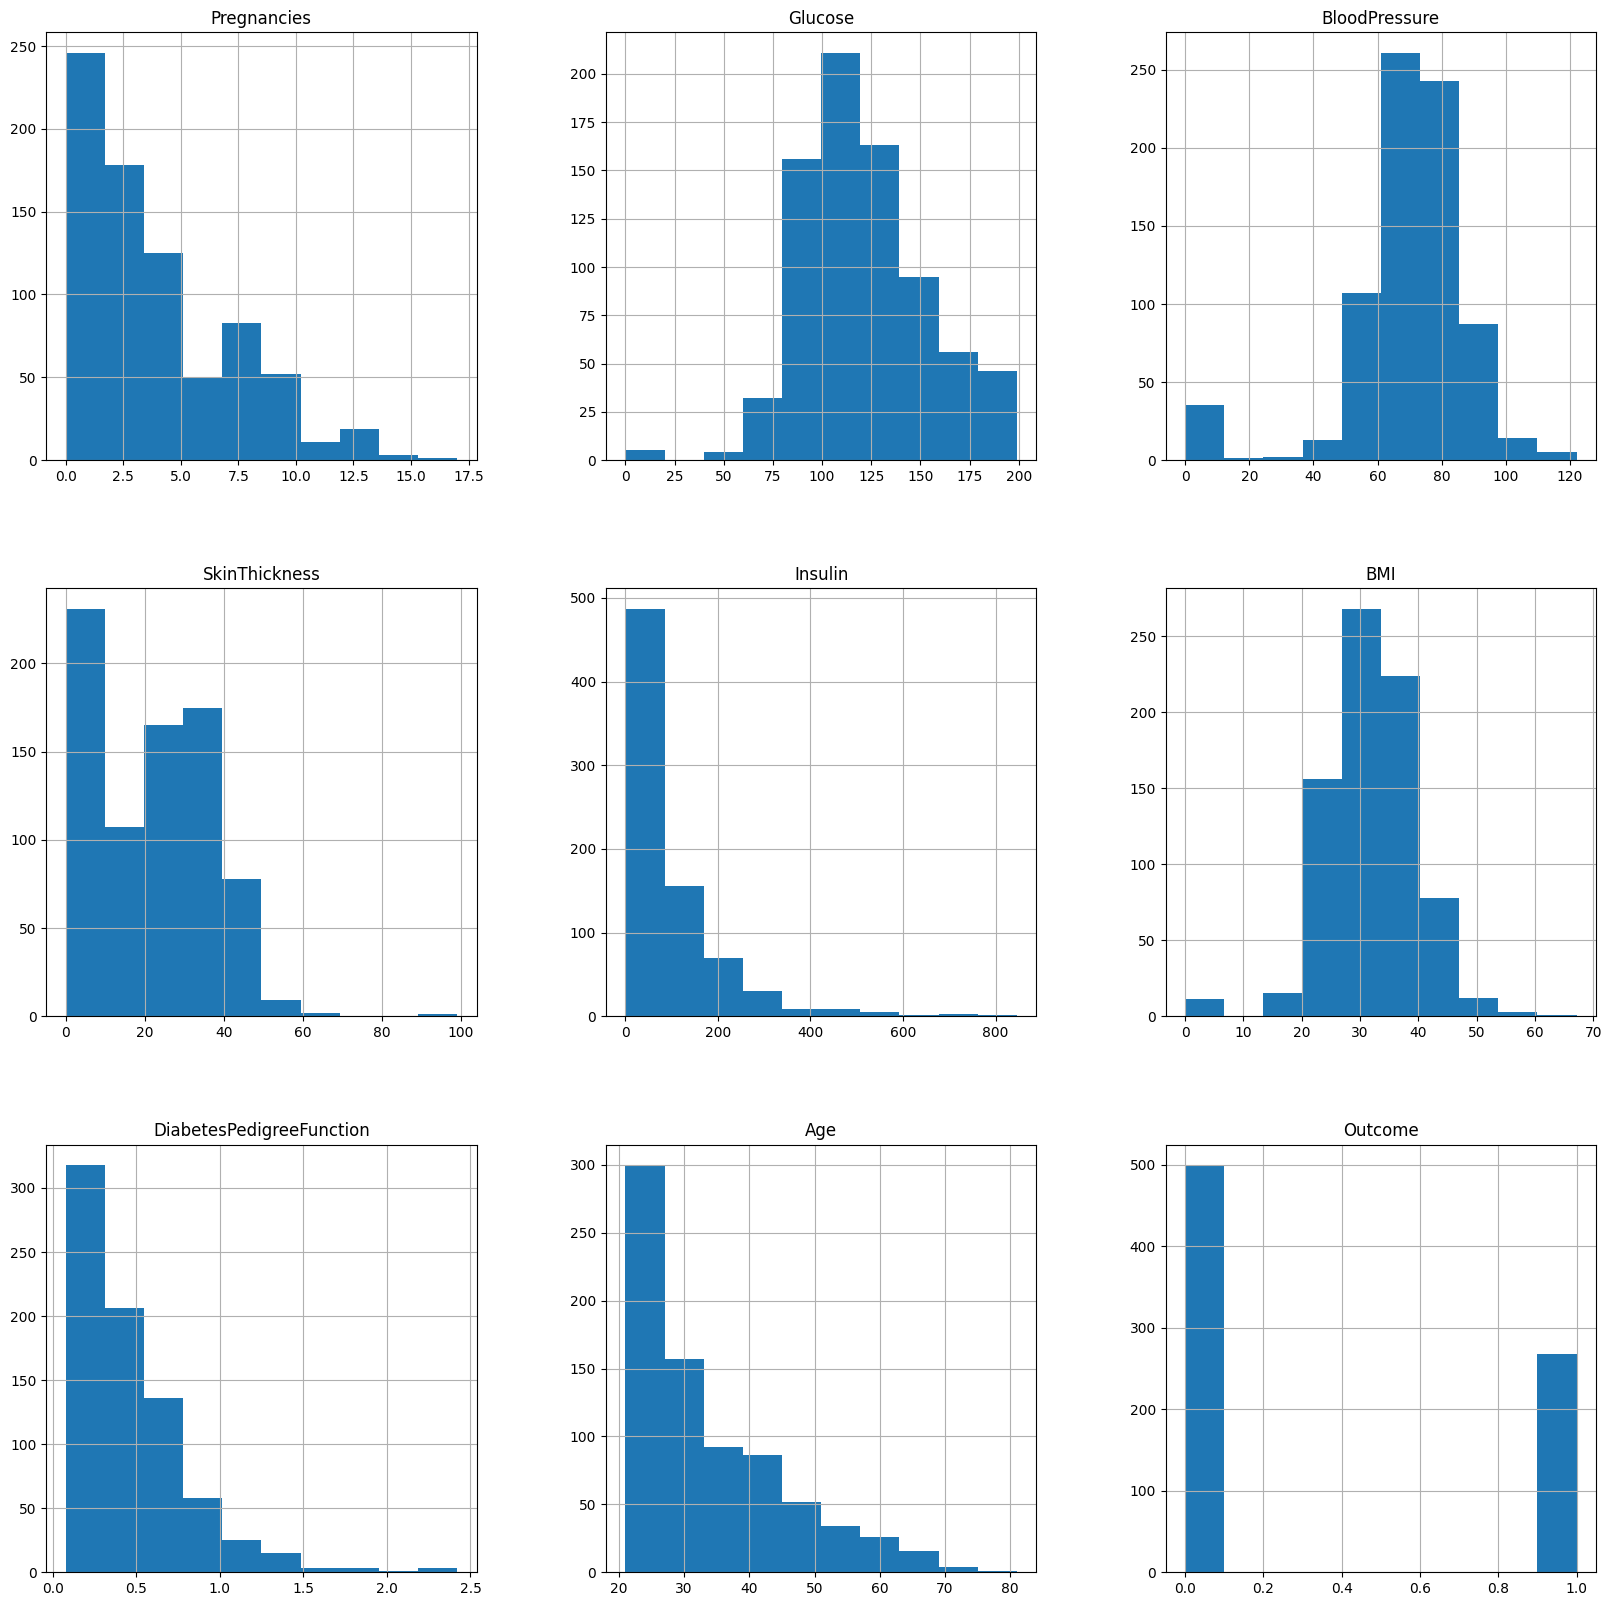

In [ ]:
# see how the data is distributed.
diabeties.hist(figsize = (20,20))

In [ ]:
# now we can see missing values
diabeties.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

#define x and y values as x is all columns except outcome and y is Outcome
X = diabeties.drop("Outcome",axis=1)
y = diabeties["Outcome"]

# split dataset as train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 21)

In [ ]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lr_score = lr.score(X_test , y_test)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training set score: 0.80
Test set score: 0.73 

Accuracy Score: 0.73 

Confusion Matrix: 
 [[129  15]
 [ 48  39]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       0.73      0.90      0.80       144
           1       0.72      0.45      0.55        87

    accuracy                           0.73       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.73      0.73      0.71       231



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

rf_ent_score = rf_ent.score(X_test , y_test)

print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))

Training set score: 1.00
Test set score: 0.73 

Accuracy Score: 0.73 

Confusion Matrix: 
 [[131  13]
 [ 49  38]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.73      0.91      0.81       144
           1       0.75      0.44      0.55        87

    accuracy                           0.73       231
   macro avg       0.74      0.67      0.68       231
weighted avg       0.73      0.73      0.71       231



In [ ]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

knn_score = knn.score(X_test , y_test)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_knn)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training set score: 0.79
Test set score: 0.72 

Accuracy Score: 0.72 

Confusion Matrix: 
 [[131  13]
 [ 52  35]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.72      0.91      0.80       144
           1       0.73      0.40      0.52        87

    accuracy                           0.72       231
   macro avg       0.72      0.66      0.66       231
weighted avg       0.72      0.72      0.69       231



In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_linear = SVC(kernel='linear',gamma='auto',probability=True)
svc_linear.fit(X_train,y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

svc_linear_score = svc_linear.score(X_test , y_test)

print("Training set score: {:.2f}".format(svc_linear.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc_linear.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_svc_linear)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc_linear))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc_linear))

Training set score: 0.81
Test set score: 0.74 

Accuracy Score: 0.74 

Confusion Matrix: 
 [[132  12]
 [ 49  38]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.73      0.92      0.81       144
           1       0.76      0.44      0.55        87

    accuracy                           0.74       231
   macro avg       0.74      0.68      0.68       231
weighted avg       0.74      0.74      0.72       231



In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

decc_score = decc.score(X_test , y_test)

print("Training set score: {:.2f}".format(decc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(decc.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_decc)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_decc))
print("Classification_Report: \n",classification_report(y_test,y_pred_decc))

Training set score: 1.00
Test set score: 0.70
Accuracy Score: 0.70
Confusion Matrix: 
 [[117  27]
 [ 42  45]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       144
           1       0.62      0.52      0.57        87

    accuracy                           0.70       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.69      0.70      0.69       231



In [ ]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)

gb_score = gbc.score(X_test , y_test)

print("Training set score: {:.2f}".format(gbc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbc.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_gbc)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_gbc))
print("Classification_Report: \n",classification_report(y_test,y_pred_gbc))

Training set score: 0.94
Test set score: 0.75
Accuracy Score: 0.75
Confusion Matrix: 
 [[128  16]
 [ 41  46]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       144
           1       0.74      0.53      0.62        87

    accuracy                           0.75       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.75      0.75      0.74       231



In [ ]:
#LGBMClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lgbmc = LGBMClassifier()
lgbmc.fit(X_train,y_train)
y_pred_lgbmc = lgbmc.predict(X_test)

lgbm_score = lgbmc.score(X_test , y_test)

print("Training set score: {:.2f}".format(lgbmc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lgbmc.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lgbmc)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lgbmc))
print("Classification_Report: \n",classification_report(y_test,y_pred_lgbmc))

[LightGBM] [Info] Number of positive: 181, number of negative: 356
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337058 -> initscore=-0.676434
[LightGBM] [Info] Start training from score -0.676434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
# XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
y_pred_xgbc = xgbc.predict(X_test)

xgb_score = xgbc.score(X_test , y_test)

print("Training set score: {:.2f}".format(xgbc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(xgbc.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_xgbc)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_xgbc))
print("Classification_Report: \n",classification_report(y_test,y_pred_xgbc))

Training set score: 1.00
Test set score: 0.71
Accuracy Score: 0.71
Confusion Matrix: 
 [[124  20]
 [ 46  41]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.73      0.86      0.79       144
           1       0.67      0.47      0.55        87

    accuracy                           0.71       231
   macro avg       0.70      0.67      0.67       231
weighted avg       0.71      0.71      0.70       231



In [ ]:
#Classifier Score
score = {
    'Model_Name' : ['LR','RF','KNN', 'SVC', 'DT','GB','LightGBM','XGB'],
       'Score'   : [lr_score, rf_ent_score, knn_score, svc_linear_score, decc_score, gb_score, lgbm_score, xgb_score]
        }

score_dataset = pd.DataFrame(score)
score_dataset

,Model_Name,Score
0,LR,0.727273
1,RF,0.731602
2,KNN,0.718615
3,SVC,0.735931
4,DT,0.701299
5,GB,0.753247
6,LightGBM,0.731602
7,XGB,0.714286


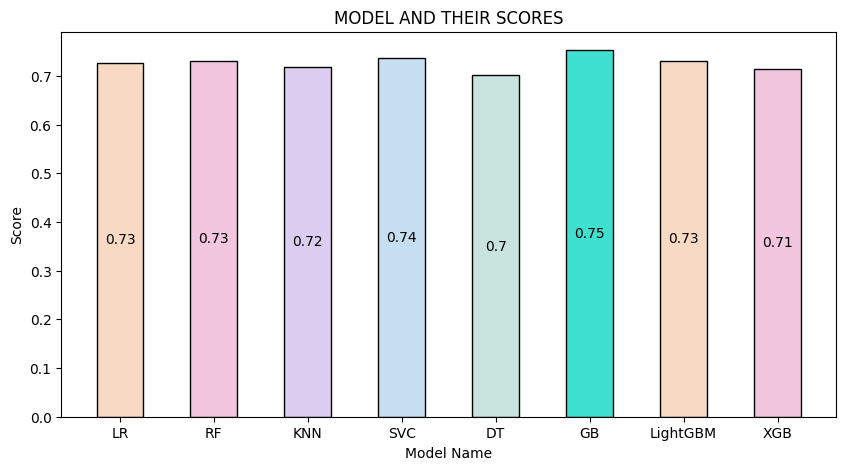

In [ ]:
# Bar plot for all accuracy score
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
barplot = plt.bar(score_dataset.Model_Name, score_dataset.Score,color =['#F7D9C4', '#F2C6DE', '#DBCDF0', '#C6DEF1', '#C9E4DE','turquoise'], edgecolor = "black", width = 0.50)
plt.bar_label(barplot , labels= round(score_dataset.Score,2), label_type='center')
plt.xlabel("Model Name")
plt.ylabel("Score")
plt.title("MODEL AND THEIR SCORES")
plt.show()